# Naïve Bayes Classifier

## Import the necessary libraires

In [1]:
import pandas as pd
import glob

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np

## Read the data

In [2]:
data = pd.read_csv('tink.csv')
data.head()

,CLASS,CONTENT
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,INTP,'Good one _____ https://www.youtube.com/wat...
2,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
3,INTJ,'18/37 @.@|||Science is not perfect. No scien...
4,INFJ,"'No, I can't draw on my own nails (haha). Thos..."


In [3]:
data['CLASS'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
Name: CLASS, dtype: int64

## Define the inputs and the target

In [4]:
inputs = data["CONTENT"]
target = data["CLASS"]

## Transform the text from the data using CountVectorizer

In [15]:
vectorizer=CountVectorizer()
inputs_transf=vectorizer.fit_transform(inputs)


## Split the transformed data into training and tesitng

* Perform an 80:20 split - 20% of the data should be dedicated to testing.
* Set the random state to 365.
* Make sure that there is a fair distribution of the representatives from each class.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(inputs_transf,target,test_size=0.2,random_state=365,stratify=target)

## Create a Naïve Bayes model

* Create an instance of the Naïve Bayes class.
* Fit the data to the model.

In [17]:
clf=MultinomialNB()
clf.fit(x_train,y_train)

MultinomialNB()

## Make predictions on the test data

In [18]:
y_test_pred=clf.predict(x_test)

## Create a confusion matrix

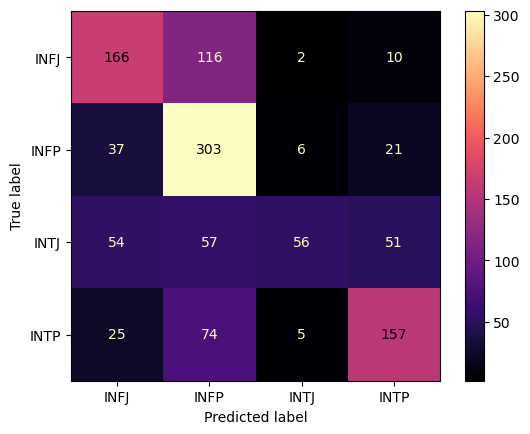

In [19]:
sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,labels=clf.classes_,cmap="magma")

## Print a classification report

In [20]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        INFJ       0.59      0.56      0.58       294
        INFP       0.55      0.83      0.66       367
        INTJ       0.81      0.26      0.39       218
        INTP       0.66      0.60      0.63       261

    accuracy                           0.60      1140
   macro avg       0.65      0.56      0.56      1140
weighted avg       0.63      0.60      0.58      1140

